# This notebook allows the recreation of figures in the paper based on the resources provided in the linked github (https://github.com/fowler-lab/tb-rnap-compensation.git)

Load all necessary packages

In [1]:
import pandas
import numpy

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import mannwhitneyu

Load all relevant data sets

In [2]:
MUTATIONS = pandas.read_pickle('tb_rnap_compensation/tables/MUTATIONS.pkl.gz')
MUTATIONS.reset_index(inplace=True)
MUTATIONS = MUTATIONS.astype({'GENE':'str'})
MUTATIONS['GENE_MUTATION'] = MUTATIONS['GENE'] + '_' + MUTATIONS['MUTATION']
MUTATIONS

,UNIQUEID,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,...,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,GENE_MUTATION
0,site.02.subj.0958.lab.22A197.iso.1,rpoB,P45S,45.0,45.0,NaN,NaN,ccg,tcg,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_P45S
1,site.02.subj.0958.lab.22A197.iso.1,rpoB,S450L,450.0,450.0,NaN,NaN,tcg,ttg,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_S450L
2,site.02.subj.0958.lab.22A197.iso.1,rpoB,A1075A,1075.0,1075.0,NaN,NaN,gct,gcc,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoB_A1075A
3,site.02.subj.0958.lab.22A197.iso.1,rpoC,D271E,271.0,271.0,NaN,NaN,gac,gag,True,...,False,True,GENE,AAM,NaN,,,02,1,rpoC_D271E
4,site.02.subj.0823.lab.2013241494.iso.1,rpoB,A1075O,1075.0,1075.0,NaN,NaN,gct,gco,True,...,False,False,GENE,AAM,NaN,,,02,1,rpoB_A1075O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517506,site.10.subj.YA00023171.lab.YA00023171.iso.1,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517507,site.10.subj.SADH00634109_S16.lab.DH00634109_S...,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517508,site.10.subj.YA00044774.lab.YA00044774.iso.1,rpoC,A542A,542.0,542.0,NaN,NaN,gcc,gcg,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoC_A542A
517509,site.10.subj.YA00166043.lab.YA00166043.iso.1,rpoB,D435V,435.0,435.0,NaN,NaN,gac,gtc,True,...,False,True,GENE,AAM,NaN,,,10,1,rpoB_D435V


In [3]:
GENOMES = pandas.read_pickle('tb_rnap_compensation/tables/GENOMES.pkl.gz')
GENOMES

,SITEID,SUBJID,LABID,ISOLATENO,SEQREPS,BELONGS_GPI,PER_SAMPLE_VCF_PRESENT,REGENOTYPED_VCF_PRESENT,CLOCKWORK_VERSION,TBI_INDEX,...,IMAGE_MD5SUM,FTP_PATH,FTP_FILENAME_VCF,TREE_PATH,TREE_FILENAME_VCF,FASTQ_MD5SUMS,SEQTREAT_SAMPLE,MYKROBE_LINEAGE_NAME_1,MYKROBE_LINEAGE_NAME_2,ENA
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.02.subj.0958.lab.22A197.iso.1,02,0958,22A197,1,197,True,True,True,0.8.3,True,...,{'02-0958-22A197-1-14': 'a587bac9ad2a0ebd36274...,/well/bag/jeffk/release_staging/,00/01/41/00/14100/site.02.iso.1.subject.0958.l...,dat/CRyPTIC2/V2/02/0958/22A197/1/regenotyped/,site.02.subj.0958.lab.22A197.iso.1.v0.8.3.rege...,,False,Lineage 2,lineage2.2.1,ERS5301054
site.02.subj.0823.lab.2013241494.iso.1,02,0823,2013241494,1,241494,True,True,True,0.8.3,True,...,{'02-0823-2013241494-1-14': '698507bed7ff19268...,/well/bag/jeffk/release_staging/,00/01/41/43/14143/site.02.iso.1.subject.0823.l...,dat/CRyPTIC2/V2/02/0823/2013241494/1/regenotyped/,site.02.subj.0823.lab.2013241494.iso.1.v0.8.3....,,False,Lineage 2,lineage2.2.3,ERS5301097
site.02.subj.0359.lab.222018-14.iso.1,02,0359,222018-14,1,14222018,True,True,True,0.8.3,True,...,{'02-0359-222018-14-1-14': '39c28529c7564ce379...,/well/bag/jeffk/release_staging/,00/01/08/73/10873/site.02.iso.1.subject.0359.l...,dat/CRyPTIC2/V2/02/0359/222018-14/1/regenotyped/,site.02.subj.0359.lab.222018-14.iso.1.v0.8.3.r...,,False,Lineage 2,lineage2.2.3,ERS5298526
site.02.subj.0224.lab.2013221088.iso.1,02,0224,2013221088,1,13221088_2013221088,True,True,True,0.8.3,True,...,,/well/bag/jeffk/release_staging/,00/01/13/37/11337/site.02.iso.1.subject.0224.l...,dat/CRyPTIC2/V2/02/0224/2013221088/1/regenotyped/,site.02.subj.0224.lab.2013221088.iso.1.v0.8.3....,,False,Lineage 2,lineage2.2.5,ERS5300527
site.02.subj.0918.lab.22A153.iso.1,02,0918,22A153,1,153,True,True,True,0.8.3,True,...,{'02-0918-22A153-1-14': 'b48e27b23f8377c209854...,/well/bag/jeffk/release_staging/,00/01/40/62/14062/site.02.iso.1.subject.0918.l...,dat/CRyPTIC2/V2/02/0918/22A153/1/regenotyped/,site.02.subj.0918.lab.22A153.iso.1.v0.8.3.rege...,,False,Lineage 2,lineage2.2.3,ERS5301016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.10.subj.YA00023171.lab.YA00023171.iso.1,10,YA00023171,YA00023171,1,1,True,True,True,0.8.3,True,...,{'10-YA00023171-YA00023171-1-7': 'da79aa0564b0...,/well/bag/jeffk/release_staging/,00/00/31/24/3124/site.10.iso.1.subject.YA00023...,dat/CRyPTIC2/V2/10/YA00023171/YA00023171/1/reg...,site.10.subj.YA00023171.lab.YA00023171.iso.1.v...,,False,Lineage 4,lineage4.3.2.1,ERS5298216
site.10.subj.SADH00634109_S16.lab.DH00634109_S16.iso.1,10,SADH00634109_S16,DH00634109_S16,1,1,False,True,False,0.8.3,True,...,,/well/bag/jeffk/release_staging/,00/00/81/50/8150/site.10.iso.1.subject.SADH006...,dat/CRyPTIC2/V2/10/SADH00634109_S16/DH00634109...,site.10.subj.SADH00634109_S16.lab.DH00634109_S...,,False,Lineage 4,lineage4.3.2,ERS2400531
site.10.subj.H37RV_SA2437.lab.H37RV_SA2437.iso.1,10,H37RV_SA2437,H37RV_SA2437,1,1,False,True,False,0.8.3,True,...,,/well/bag/jeffk/release_staging/,00/01/45/29/14529/site.10.iso.1.subject.H37Rv_...,dat/CRyPTIC2/V2/10/H37RV_SA2437/H37RV_SA2437/1...,site.10.subj.H37RV_SA2437.lab.H37RV_SA2437.iso...,,False,Lineage 4,lineage4.10,NO_ENA


In [4]:
EFFECTS = pandas.read_pickle('tb_rnap_compensation/tables/EFFECTS.pkl.gz')
EFFECTS.reset_index(inplace=True)
EFFECTS['GENE_MUTATION'] = EFFECTS['GENE'] + '_' + EFFECTS['MUTATION']
EFFECTS = EFFECTS[(EFFECTS.DRUG=='RIF') & (EFFECTS.PREDICTION=='R') & (~EFFECTS.MUTATION.str[-1].isin(['O','X']))]
EFFECTS

,UNIQUEID,DRUG,GENE,MUTATION,CATALOGUE_NAME,CATALOGUE_VERSION,CATALOGUE_GRAMMAR,SITEID,PREDICTION,DEFAULT_CATALOGUE,GENE_MUTATION
3,site.02.subj.0958.lab.22A197.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
16,site.02.subj.0918.lab.22A153.iso.1,RIF,rpoB,D435G,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_D435G
45,site.02.subj.1033.lab.2013185075.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
51,site.02.subj.0739.lab.2013221518.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
89,site.02.subj.0104.lab.22A057.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,02,R,True,rpoB_S450L
...,...,...,...,...,...,...,...,...,...,...,...
1074634,site.10.subj.SATRL0115669_S18.lab.TRL0115669_S...,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074647,site.10.subj.XD01227882.lab.XD01227882.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074653,site.10.subj.WG00269790.lab.WG00269790.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L
1074661,site.10.subj.YA00008913.lab.YA00008913.iso.1,RIF,rpoB,S450L,CRyPTIC,v1.31,GARC1,10,R,True,rpoB_S450L


In [5]:
lineage_mut = pandas.read_csv('lineage_MUTATIONS.csv')
lineage_mut['GENE_MUTATION'] = lineage_mut['GENE'] + '_' + lineage_mut['MUTATION']
lineage_mut

,Unnamed: 0,SNPIT_ID,SPECIES,LINEAGE,SUBLINEAGE,GENE,MUTATION,GENE_MUTATION
0,0,Dassie,Dassie bacillus (ex Procavia capensis),NaN,NaN,PE_PGRS11,T469N,PE_PGRS11_T469N
1,1,Dassie,Dassie bacillus (ex Procavia capensis),NaN,NaN,PE_PGRS11,R512L,PE_PGRS11_R512L
2,2,Dassie,Dassie bacillus (ex Procavia capensis),NaN,NaN,PE_PGRS11,P518L,PE_PGRS11_P518L
3,3,Dassie,Dassie bacillus (ex Procavia capensis),NaN,NaN,PE_PGRS2,A52S,PE_PGRS2_A52S
4,4,Dassie,Dassie bacillus (ex Procavia capensis),NaN,NaN,PE_PGRS30,G309R,PE_PGRS30_G309R
...,...,...,...,...,...,...,...,...
12635,12635,xtype,M. tuberculosis,Lineage 4,X-type,ppgK,N140S,ppgK_N140S
12636,12636,xtype,M. tuberculosis,Lineage 4,X-type,prpC,D225D,prpC_D225D
12637,12637,xtype,M. tuberculosis,Lineage 4,X-type,pyrB,G134G,pyrB_G134G
12638,12638,xtype,M. tuberculosis,Lineage 4,X-type,recC,F497L,recC_F497L


In [6]:
PLATES = pandas.read_pickle('tb_rnap_compensation/tables/UKMYC_PLATES.pkl.gz')
PLATES.reset_index(inplace=True)
PLATES

,UNIQUEID,SITEID,SUBJID,LABID,ISOLATENO,READINGDAY,BELONGS_GPI,PLATEDESIGN,TREE_PATH,IMAGEFILENAME,IMAGE_MD5SUM,DUPLICATED_IMAGE,IM_IMAGE_DOWNLOADED,IM_IMAGE_FILTERED,IM_WELLS_IDENTIFIED,IM_POS1GROWTH,IM_POS2GROWTH,IM_POS_AVERAGE,IM_DRUGS_INCONSISTENT_GROWTH,TRUST_PHENOTYPES
0,site.11.subj.MDR044.lab.SWE-33.iso.1,11,MDR044,SWE-33,1,10,False,UKMYC5,dat/CRyPTIC2/V2/11/MDR044/SWE-33/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
1,site.11.subj.MDR045.lab.SWE-34.iso.1,11,MDR045,SWE-34,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR045/SWE-34/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
2,site.11.subj.MDR046.lab.SWE-35.iso.1,11,MDR046,SWE-35,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR046/SWE-35/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
3,site.11.subj.MDR047.lab.SWE-36.iso.1,11,MDR047,SWE-36,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR047/SWE-36/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
4,site.11.subj.MDR048.lab.SWE-37.iso.1,11,MDR048,SWE-37,1,10,True,UKMYC5,dat/CRyPTIC2/V2/11/MDR048/SWE-37/1/10/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20632,site.17.subj.P3038.lab.086-15-3038-B.iso.1,17,P3038,086-15-3038-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3038/086-15-3038-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20633,site.17.subj.P3424.lab.086-15-3424-B.iso.1,17,P3424,086-15-3424-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3424/086-15-3424-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20634,site.17.subj.P3524.lab.086-15-3524-B.iso.1,17,P3524,086-15-3524-B,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3524/086-15-3524-B/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True
20635,site.17.subj.P3524.lab.086-15-3524-M2.iso.1,17,P3524,086-15-3524-M2,1,21,True,UKMYC6,dat/CRyPTIC2/V2/17/P3524/086-15-3524-M2/1/21/,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,True


**Figure 1A: Plot growth of all pan-susceptible samples against all samples with only resistance mutations**

2.9538806538738147e-12


/Users/viktoriabrunner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


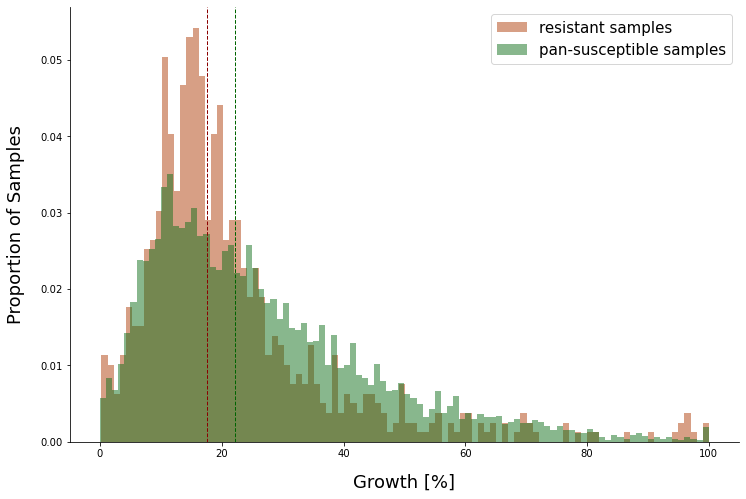

In [7]:
colors = sns.color_palette("dark")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

pan_sus_samples = GENOMES[(GENOMES.WGS_PREDICTION_STRING.str[0:4].isin(['SSSS']))].index.to_series()

res_gene_mutations = EFFECTS.GENE_MUTATION
query = res_gene_mutations.unique()

rpo_lineages = lineage_mut[(lineage_mut.SPECIES == 'M. tuberculosis') & ((lineage_mut.GENE == 'rpoA')|(lineage_mut.GENE == 'rpoB')|(lineage_mut.GENE == 'rpoC')|(lineage_mut.GENE == 'rpoZ'))]
lineage_mutations = rpo_lineages.GENE_MUTATION
lineage_mutations
add = pandas.Series(['rpoB_A1075A', 'rpoC_G594E'])
lineage_mutations.append(add)
query = numpy.append(query, lineage_mutations)

MUTATIONS['SYNONYMOUS'] = MUTATIONS['MUTATION'].apply(lambda x: x[0]==x[-1])
syn_mutations = MUTATIONS[MUTATIONS.SYNONYMOUS].GENE_MUTATION.unique()
query = numpy.append(query, syn_mutations)

MUTATIONS['QUERY'] = MUTATIONS.GENE_MUTATION.isin(query)
tmp = MUTATIONS.groupby(MUTATIONS.UNIQUEID).mean()
only_query = tmp[tmp.QUERY==1].index.to_series()
only_res = MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(res_gene_mutations.unique())) & (MUTATIONS.UNIQUEID.isin(only_query))].UNIQUEID

data1 = PLATES[(PLATES.UNIQUEID.isin(pan_sus_samples.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)
data2 = PLATES[(PLATES.UNIQUEID.isin(only_res.values.tolist()))].IM_POS_AVERAGE
data2.dropna(inplace=True)
stat, p = mannwhitneyu(data2, data1)
print(p)

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)

plt.hist(data2, bins=100, alpha=0.5, label="resistant samples", density=True, color = colors[1])
plt.axvline(data2.median(), color='darkred', linestyle='dashed', linewidth=1)
plt.hist(data1, bins=100, alpha=0.5, label="pan-susceptible samples", density=True, color = colors[2])
plt.axvline(data1.median(), color='darkgreen', linestyle='dashed', linewidth=1)
plt.xlabel("Growth [%]", size=18, labelpad = 15)
plt.ylabel("Proportion of Samples", size=18, labelpad = 15)
plt.legend(loc='upper right', fontsize = 15)

**Figure 1B,C,D: Plot growth of all pan-susceptible samples against samples with most prevalent resistance mutations**

rpoB_S450L 0.004370955721574559
rpoB_H445Y 0.01260896272020915
rpoB_D435V 3.9207542608554665e-14


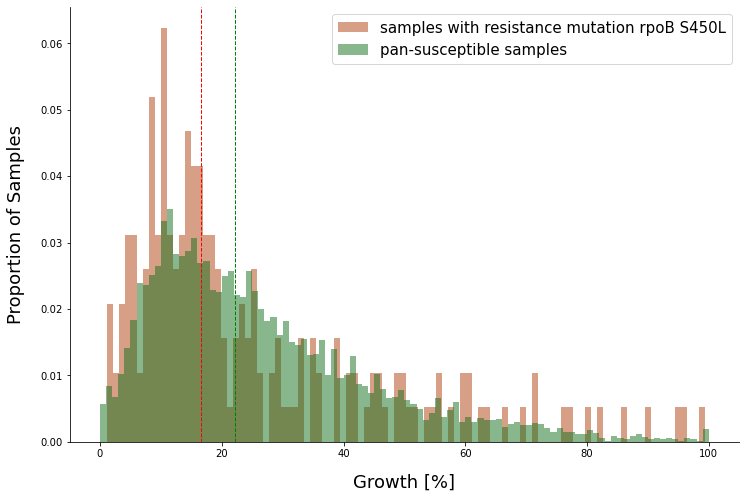

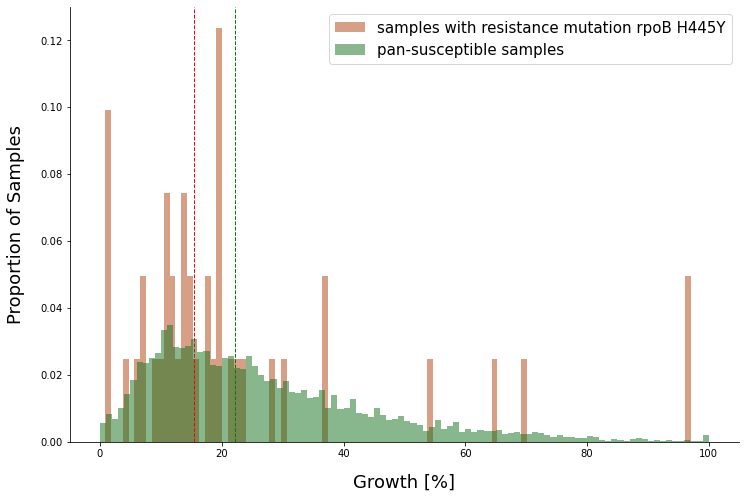

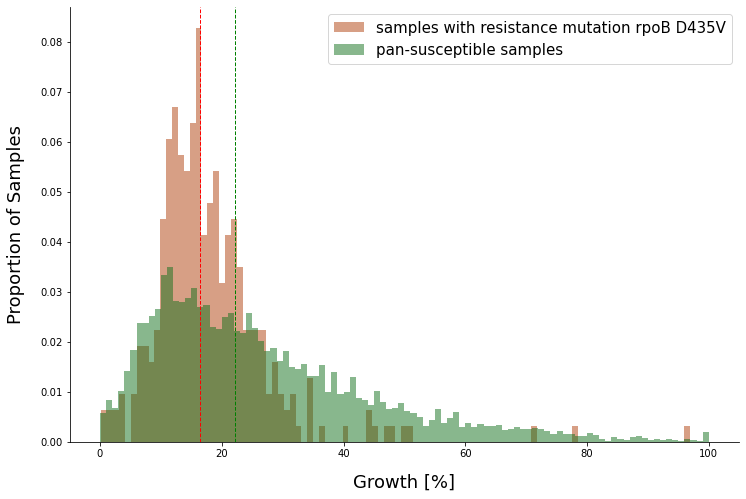

In [42]:
data1 = PLATES[(PLATES.UNIQUEID.isin(pan_sus_samples.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)

res_gene_mutations = EFFECTS.GENE_MUTATION.unique()

for res in res_gene_mutations:
    spec_res = MUTATIONS[(MUTATIONS.GENE_MUTATION==res) & (MUTATIONS.UNIQUEID.isin(only_query))].UNIQUEID
    data2 = PLATES[(PLATES.UNIQUEID.isin(spec_res.values.tolist()))].IM_POS_AVERAGE
    data2.dropna(inplace=True)
    
    if len(data2) < 40:
        continue
        
    stat, p = mannwhitneyu(data2, data1)
    print(res, p)
    
    if p1<(0.01/len(res_gene_mutations)):
        
        fig, ax = plt.subplots()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        fig.set_size_inches(12, 8)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        plt.hist(data2, bins=100, alpha=0.5, label="samples with resistance mutation " + res[0:4] + ' ' + res[5:], density=True, color = colors[1])
        plt.axvline(data2.median(), color='r', linestyle='dashed', linewidth=1)
        plt.hist(data1, bins=100, alpha=0.5, label="pan-susceptible samples", density=True, color = colors[2])
        plt.axvline(data1.median(), color='g', linestyle='dashed', linewidth=1)
        plt.xlabel("Growth [%]", size=18, labelpad = 15)
        plt.ylabel("Proportion of Samples", size=18, labelpad = 15)
        plt.legend(loc='upper right', fontsize = 15)

**Figure 2A: Cut-off decision for individual mutation prevalence**

To obtain the below data, run script 1: 'calculate-fisher-tests.py' with different settings: 
- n_other and n_resistance can be varied and determine cutoffs for prevalence of mutations that are considered for analysis
Run script 2: 'results-evaluation.py' with different settings:
- p_value, correct_p_value and method can be varied to change the p-value that is needed to deem an association significant and to compare to either a conservative or inclusive list of reference CMs ('Ref_CMs.xlsx')

I tested script 1 for cut-offs = [25, 30, 40, 45, 50, 60, 70, 80, 90] combined with script 2 p-value = 0.01 including Bonferroni correction for multiple testing and plotted ratio of found conservative and inclusive references (TPR/ Sensitivity), as well as number of new detected hits (stars indicate chosen cutoffs):

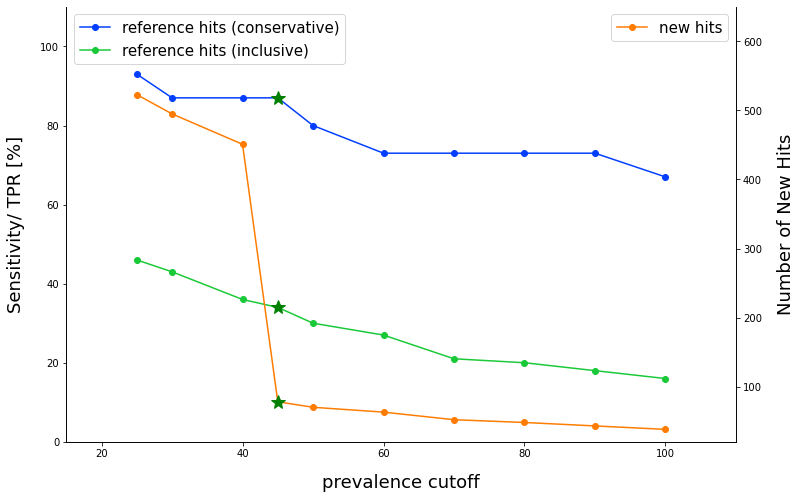

In [9]:
colors = sns.color_palette("bright")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

cutoff = [25,30,40,45,50,60,70,80,90,100]
n_refs = [0.93, 0.87, 0.87, 0.87, 0.8, 0.73, 0.73, 0.73, 0.73, 0.67]
n_refs = [element * 100 for element in n_refs]

n_refs_more = [0.46, 0.43, 0.36, 0.34, 0.3, 0.27, 0.21, 0.2, 0.18, 0.16]
n_refs_more = [element * 100 for element in n_refs_more]

n_corr = [523, 495, 451, 78, 70, 63, 52, 48, 43, 38]

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)

ax1.spines["top"].set_visible(False)
ax1.set_xlabel('prevalence cutoff', size=18, labelpad = 15)
ax1.set_xlim(15, 110)
ax1.set_ylabel('Sensitivity/ TPR [%]', size=18, labelpad = 15)
ax1.set_ylim(0, 110)
#n_refs = [element * 100 for element in n_refs]
ax1.plot(cutoff, n_refs, color=colors[0], marker = 'o', label = 'reference hits (conservative)')
plt.plot(cutoff[3], n_refs[3], 'g*', markersize = 15)
ax1.tick_params(axis='y')
#n_refs_more = [element * 100 for element in n_refs_more]
ax1.plot(cutoff, n_refs_more, color=colors[2], marker = 'o', label = 'reference hits (inclusive)')
plt.plot(cutoff[3], n_refs_more[3], 'g*', markersize = 15)
ax1.legend(loc=2, fontsize = 15)

ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)
ax2.set_ylabel('Number of New Hits', size=18, labelpad = 15)  
ax2.set_ylim(20, 650)
ax2.plot(cutoff, n_corr, color=colors[1], marker = 'o', label = 'new hits')
plt.plot(cutoff[3], n_corr[3], 'g*', markersize = 15)
ax2.tick_params(axis='y')
ax2.legend(loc=0, fontsize = 15)

**Figure 2B: Cutoff decision for p-value**

The prevalence cutoff was set to 45 for both resistance and other mutations and for this setting I evaluated the number of new hits depending on p-value = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9] for script 2 'results-evaluation.py'
The star indicates p-value of 0.01 with Bonferroni, which was chosen for downstream analysis:

Text(0, 0.5, 'Number of New Hits')

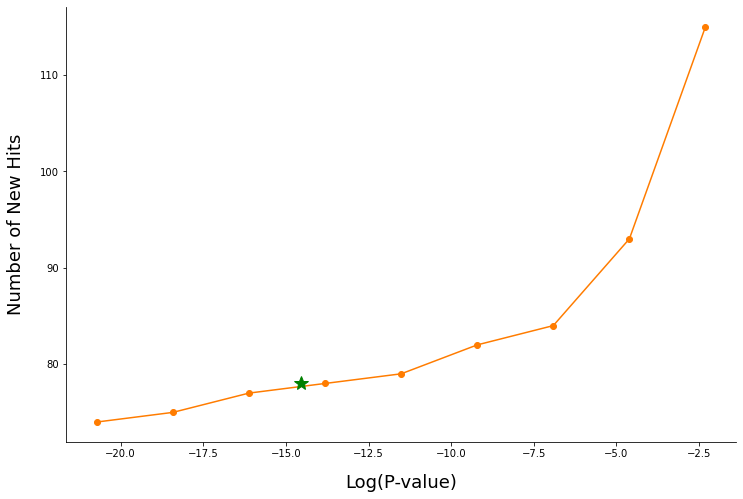

In [10]:
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)

p_value = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001, 0.00000001, 0.000000001]
p_value = numpy.log(p_value)
n_hits = [115, 93, 84, 82, 79, 78, 77, 75, 74]
plt.plot(p_value,n_hits, marker ='o', color= colors[1])
plt.plot(numpy.log(4.76190476190476E-07), 78, 'g*', markersize = 15)
plt.xlabel('Log(P-value)', size=18, labelpad = 15)
plt.ylabel('Number of New Hits', size=18, labelpad = 15)

**Table S1: Hit list with significant correlations of resistance mutations with co-occuring mutations**

In [11]:
hits = pandas.read_excel('hits.xlsx')
print(hits.to_latex(index=False))

\begin{tabular}{ll}
\toprule
resistant\_mutation & other\_mutation \\
\midrule
        rpoB\_S450L &     rpoC\_N826T \\
        rpoB\_S450L &     rpoC\_D485Y \\
        rpoB\_S450L &     rpoB\_A692T \\
        rpoB\_S450L &     rpoB\_I480V \\
        rpoB\_S450L &     rpoC\_H525Q \\
        rpoB\_S450L &     rpoA\_V183G \\
        rpoB\_S450L &    rpoC\_E1092D \\
        rpoB\_L430P &    rpoC\_E1092D \\
        rpoB\_V170F &    rpoC\_E1092D \\
        rpoB\_S450L &     rpoB\_A286V \\
        rpoB\_S450L &     rpoB\_V496A \\
        rpoB\_S450L &     rpoC\_T812I \\
        rpoB\_S450L &     rpoC\_G519D \\
        rpoB\_S450W &     rpoC\_G519D \\
        rpoB\_D435Y &     rpoB\_c-61t \\
        rpoB\_D435G &    rpoB\_I1106T \\
        rpoB\_L452P &    rpoB\_I1106T \\
        rpoB\_S450L &     rpoC\_W484G \\
        rpoB\_V170F &     rpoC\_W484G \\
        rpoB\_S450L &    rpoC\_P1040S \\
        rpoB\_S450L &     rpoB\_Q975H \\
        rpoB\_S450L &     rpoC\_P481T \\
        rpoB\_D435V

**Figure S1: Cutoff decision for prevalence of combination resistance + CM**

The numbers below were obtained by testing the percentage of found references and number of new hits for different cutoffs for the combined prevalence of the resistance and compensatory mutations

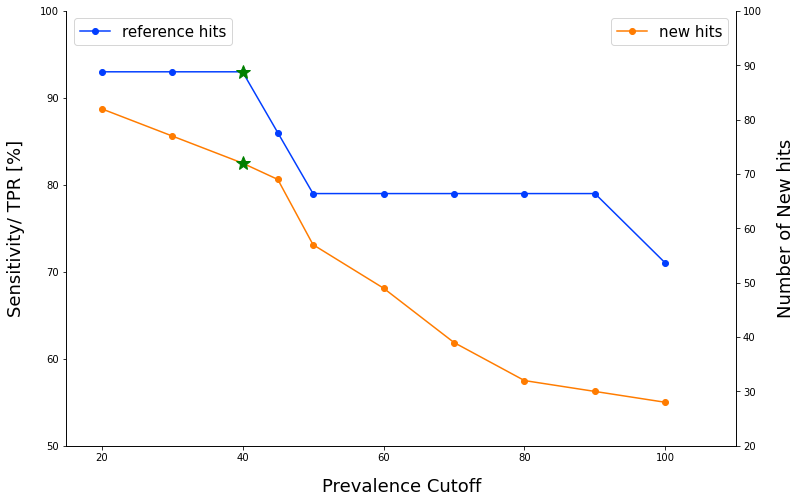

In [12]:
cutoffs = [20, 30, 40, 45, 50, 60, 70, 80, 90, 100]
save_ref = [0.93, 0.93, 0.93, 0.86, 0.79, 0.79, 0.79, 0.79, 0.79, 0.71]
save_new_hits = [82, 77, 72, 69, 57, 49, 39, 32, 30, 28]

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)

ax1.spines["top"].set_visible(False)
ax1.set_xlabel('Prevalence Cutoff', size=18, labelpad = 15)
ax1.set_xlim(15, 110)
ax1.set_ylabel('Sensitivity/ TPR [%]', size=18, labelpad = 15)
ax1.set_ylim(50, 100)
refs = [element * 100 for element in save_ref]
ax1.plot(cutoffs, refs, color = colors[0], marker = 'o', label = 'reference hits')
plt.plot(cutoffs[2], refs[2], 'g*', markersize = 15)
ax1.tick_params(axis='y')
ax1.legend(loc=2, fontsize = 15)

ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)
ax2.set_ylabel('Number of New hits', size=18, labelpad = 15)  
ax2.set_ylim(20, 100)
ax2.plot(cutoffs, save_new_hits, color = colors[1], marker = 'o', label = 'new hits')
plt.plot(cutoffs[2], save_new_hits[2], 'g*', markersize = 15)
ax2.tick_params(axis='y')
ax2.legend(loc=0, fontsize = 15)

**Table S2: Filtered list with all significantly resistance-associated other mutations**

In [44]:
rows = []
for res in hits.resistant_mutation.unique():
    res_samples = MUTATIONS[MUTATIONS.GENE_MUTATION==res].UNIQUEID
    for other in hits.other_mutation.unique():
        prevalence = len(MUTATIONS[(MUTATIONS.GENE_MUTATION==other) & (MUTATIONS.UNIQUEID.isin(res_samples))].UNIQUEID)
        if prevalence > 40:
            rows.append([res, other, prevalence])
hits_filtered = pandas.DataFrame(rows, columns = ['resistant_mutation', 'other_mutation', 'prevalence'])
print(hits_filtered.to_latex(index=False))

\begin{tabular}{llr}
\toprule
resistant\_mutation & other\_mutation &  prevalence \\
\midrule
        rpoB\_S450L &     rpoC\_N826T &          64 \\
        rpoB\_S450L &     rpoC\_D485Y &         194 \\
        rpoB\_S450L &     rpoB\_A692T &          79 \\
        rpoB\_S450L &     rpoB\_I480V &          78 \\
        rpoB\_S450L &     rpoC\_H525Q &          46 \\
        rpoB\_S450L &     rpoA\_V183G &          77 \\
        rpoB\_S450L &    rpoC\_E1092D &        1989 \\
        rpoB\_S450L &     rpoB\_A286V &          56 \\
        rpoB\_S450L &     rpoB\_V496A &          60 \\
        rpoB\_S450L &     rpoC\_T812I &          51 \\
        rpoB\_S450L &     rpoC\_G519D &          51 \\
        rpoB\_S450L &     rpoB\_c-61t &         737 \\
        rpoB\_S450L &     rpoC\_W484G &          80 \\
        rpoB\_S450L &    rpoC\_P1040S &         118 \\
        rpoB\_S450L &     rpoB\_Q975H &          65 \\
        rpoB\_S450L &     rpoC\_P481T &          69 \\
        rpoB\_S450L &     

**Figure 3A: Plot growth distribution of all pan-susceptible samples against those with only resistance mutations and those with resistance and CMs incl. p-value calculation**

resistant to susceptible: 7.66387726655333e-17 resistant to resistant + CMs 3.75380263616983e-54 susceptible to resistant + CMs 6.2431774864011485e-22


/Users/viktoriabrunner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


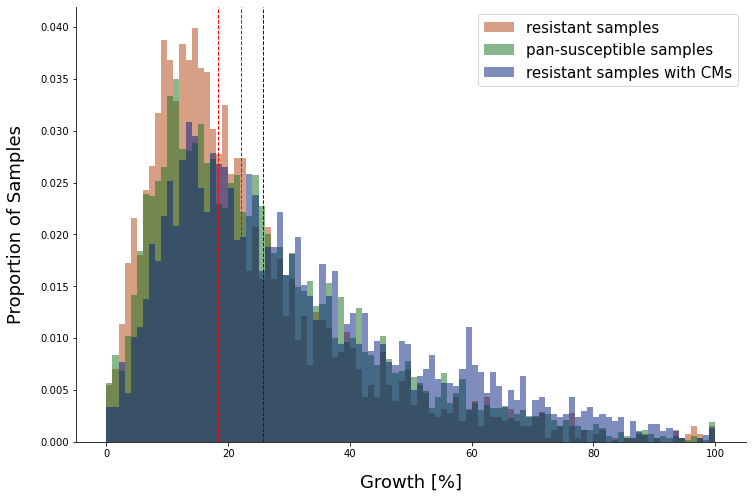

In [14]:
colors = sns.color_palette("dark")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

res_CM_samples = []

for i,name in enumerate(hits.resistant_mutation.unique()):
    
    resistance = MUTATIONS[(MUTATIONS.GENE_MUTATION==hits.resistant_mutation.unique()[i])].UNIQUEID
    hit_samples_local = MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(hits.other_mutation.values.tolist()))&(MUTATIONS.UNIQUEID.isin(resistance.tolist()))].UNIQUEID.unique()
    
    res_CM_samples.append(hit_samples_local)

res_CM_samples = numpy.concatenate(res_CM_samples)
res_CM_samples = pandas.Series(res_CM_samples)

res_samples = EFFECTS[~(EFFECTS.UNIQUEID.isin(res_CM_samples))].UNIQUEID.values.tolist()
res_samples = pandas.Series(res_samples)

data1 = PLATES[(PLATES.UNIQUEID.isin(pan_sus_samples.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)

data2 = PLATES[(PLATES.UNIQUEID.isin(res_samples.values.tolist()))].IM_POS_AVERAGE
data2.dropna(inplace=True)

stat1, p1 = mannwhitneyu(data2, data1)

data3 = PLATES[(PLATES.UNIQUEID.isin(res_CM_samples.values.tolist()))].IM_POS_AVERAGE
data3.dropna(inplace=True)

stat2, p2 = mannwhitneyu(data2, data3)
stat3, p3 = mannwhitneyu(data3, data1)

print('resistant to susceptible:',p1, 'resistant to resistant + CMs', p2, 'susceptible to resistant + CMs', p3)

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)

plt.hist(data2, bins=100, alpha=0.5, label="resistant samples", density=True, color = colors[1])
plt.axvline(data2.median(), color='r', linestyle='dashed', linewidth=1)
plt.hist(data1, bins=100, alpha=0.5, label="pan-susceptible samples", density=True, color = colors[2])
plt.axvline(data1.median(), color='g', linestyle='dashed', linewidth=1)
plt.hist(data3, bins=100, alpha=0.5, label="resistant samples with CMs", density=True, color = colors[0])
plt.axvline(data3.median(), color='b', linestyle='dashed', linewidth=1)

plt.xlabel("Growth [%]", size=18, labelpad = 15)
plt.ylabel("Proportion of Samples", size=18, labelpad = 15)

plt.legend(loc='upper right', fontsize = 15)

**Figure 3B: Plot lineage distribution for overall data set**

/Users/viktoriabrunner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


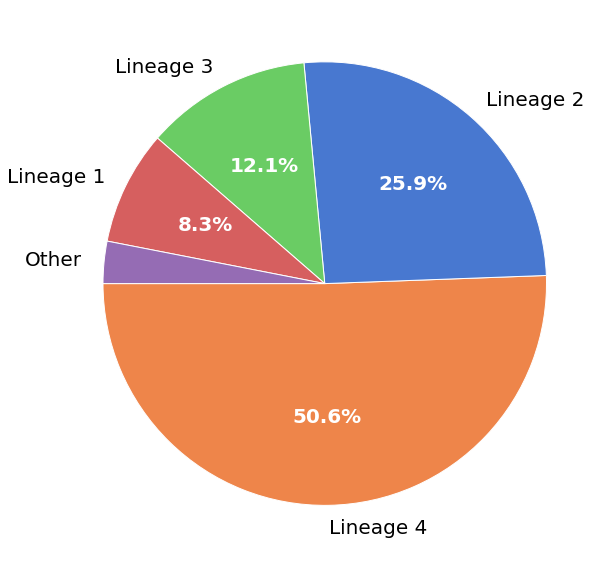

In [15]:
colors = sns.color_palette("muted")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

query = ['Mixed', 'Unknown', 'Lineage Bovis', 'Lineage 5', 'Lineage 6', 'Lineage 7', 'Lineage Caprae']
query
GENOMES['cut_lineages'] = GENOMES.MYKROBE_LINEAGE_NAME_1
GENOMES.cut_lineages.loc[GENOMES.MYKROBE_LINEAGE_NAME_1.isin(query)] = 'Other'
GENOMES[(GENOMES.cut_lineages=='Other')]

lineages = GENOMES.cut_lineages.value_counts()

fig, axes = plt.subplots()
fig.set_size_inches(12, 8)

def my_autopct(pct):
    return ('%.1f%%'% pct) if pct > 5 else ''

patches, texts, pcts = plt.pie(lineages, labels = lineages.index, autopct = my_autopct, startangle=180, 
                               wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, 
                               textprops={"fontsize":20})

for j, patch in enumerate(patches):
            if texts[j].get_text() == 'Lineage 2':
                patch.set_facecolor(colors[0])
            if texts[j].get_text() == 'Lineage 4':
                patch.set_facecolor(colors[1])
            if texts[j].get_text() == 'Lineage 3':
                patch.set_facecolor(colors[2])
            if texts[j].get_text() == 'Lineage 1':
                patch.set_facecolor(colors[3])
            if texts[j].get_text() == 'Other':
                patch.set_facecolor(colors[4])

plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

**Figure 3C: Plot lineage distribution for most prevalent resistance mutation S450L**

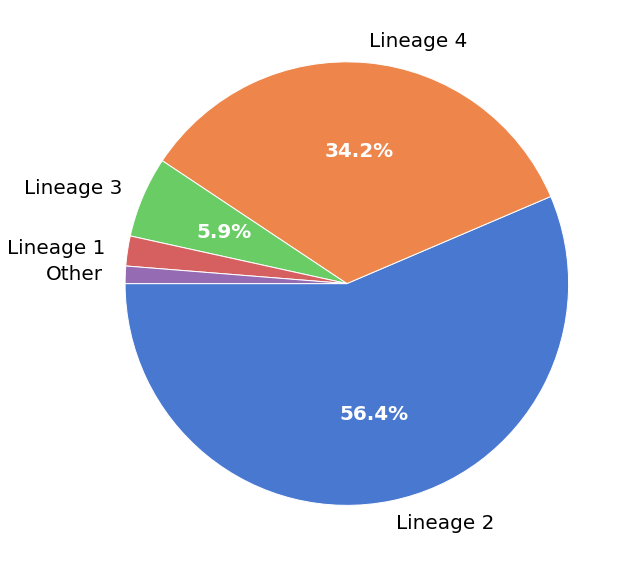

In [16]:
colors = sns.color_palette("muted")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

resistant_mutation_samples = MUTATIONS[(MUTATIONS.GENE_MUTATION=='rpoB_S450L')].UNIQUEID
lineages = GENOMES[(GENOMES.index.isin(resistant_mutation_samples))].cut_lineages.value_counts()

fig, axes = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)

def my_autopct(pct):
    return ('%.1f%%'% pct) if pct > 5 else ''

patches, texts, pcts = plt.pie(lineages, labels = lineages.index, startangle=180, autopct = my_autopct,
                               wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, 
                               textprops={"fontsize":20})

for j, patch in enumerate(patches):
    if texts[j].get_text() == 'Lineage 2':
        patch.set_facecolor(colors[0])
    if texts[j].get_text() == 'Lineage 4':
        patch.set_facecolor(colors[1])
    if texts[j].get_text() == 'Lineage 3':
        patch.set_facecolor(colors[2])
    if texts[j].get_text() == 'Lineage 1':
        patch.set_facecolor(colors[3])
    if texts[j].get_text() == 'Other':
        patch.set_facecolor(colors[4])
    

plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()

**Figure 3D,E,F,G and S2: Plot growth distribution of all pan-susceptible samples against those with a specific resistance mutations and those with this resistance mutations and a specific CM incl. p-value calculation**

rpoB_S450L_rpoC_E1092D resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 3.139867119343947e-13 susceptible to resistant + CMs 2.7820591307339676e-09
rpoB_S450L_rpoC_V483G resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 0.0063753771139158635 susceptible to resistant + CMs 0.4582132462024644
rpoB_S450L_rpoB_c-61t resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 1.8897560210517747e-08 susceptible to resistant + CMs 0.0003534008018839812
rpoB_S450L_rpoC_I491V resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 2.4013535372649758e-34 susceptible to resistant + CMs 9.27128879265071e-31
rpoB_S450L_rpoC_V483A resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 9.598935059043509e-19 susceptible to resistant + CMs 1.801801043265379e-13
rpoB_S450L_rpoC_I491T resistant to susceptible: 3.650214223947624e-06 resistant to resistant + CMs 2.2470107987150967e-17 suscepti

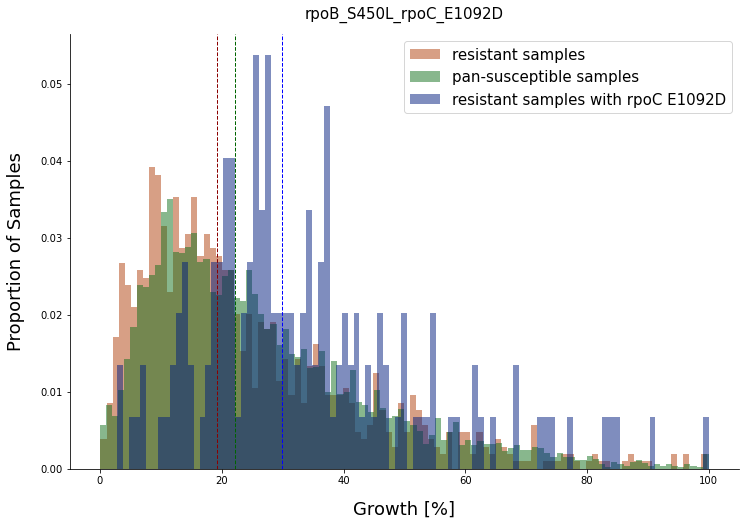

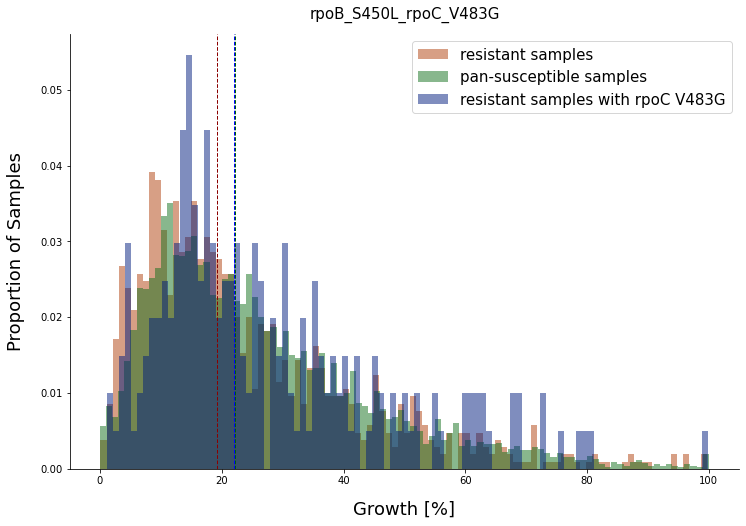

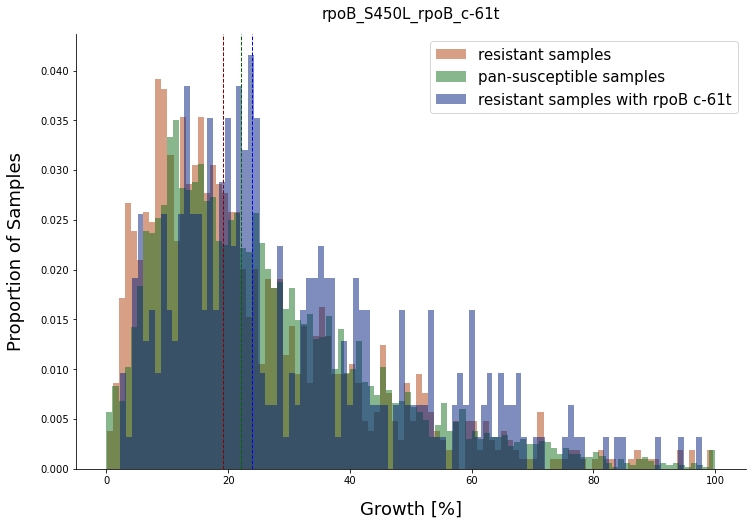

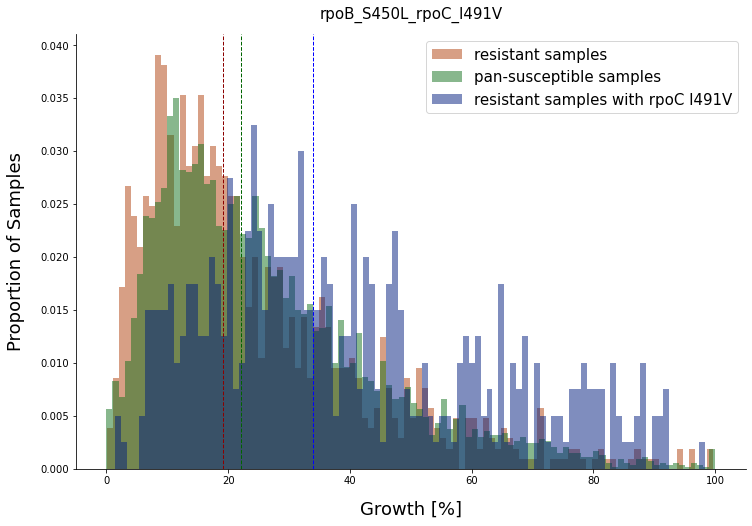

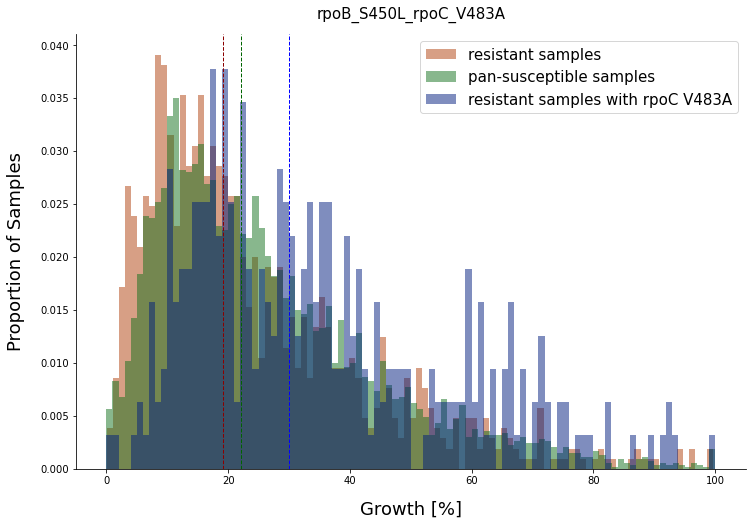

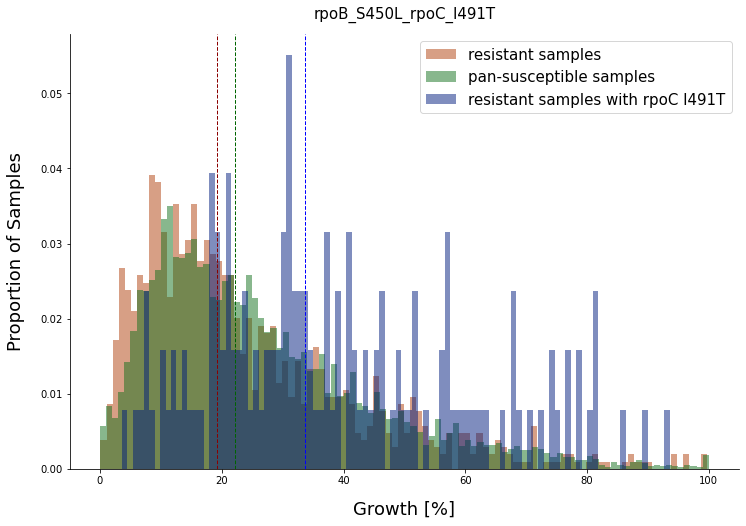

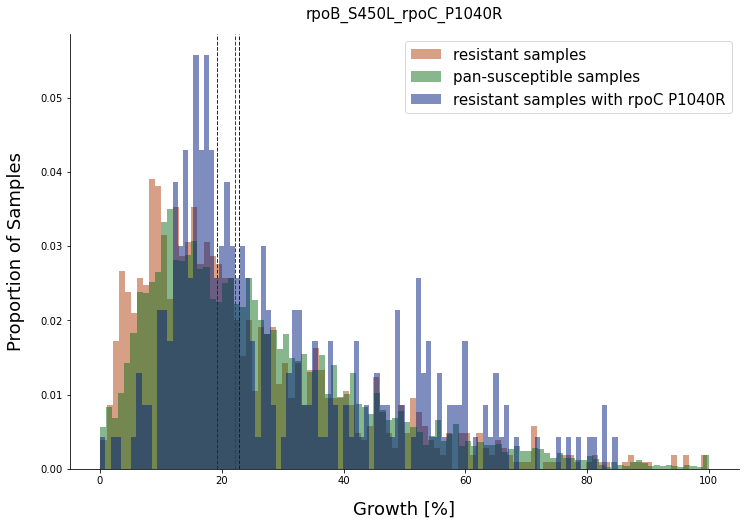

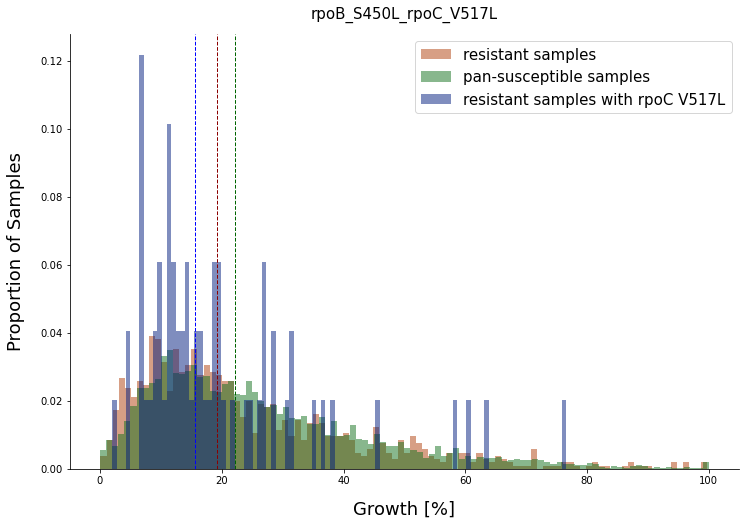

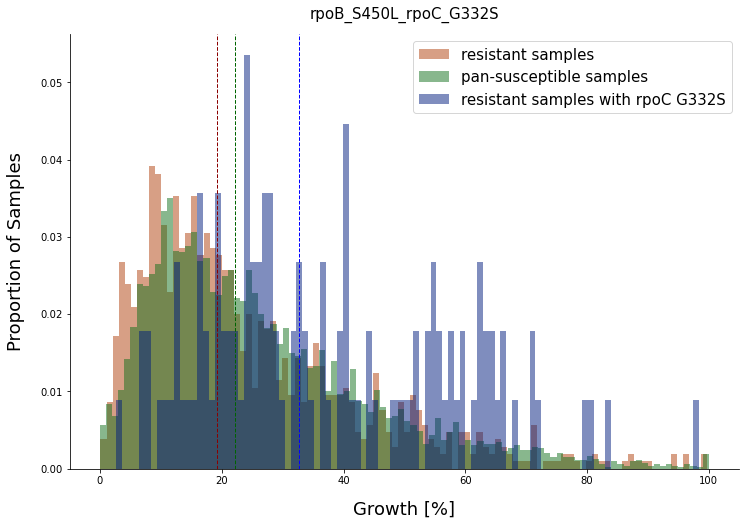

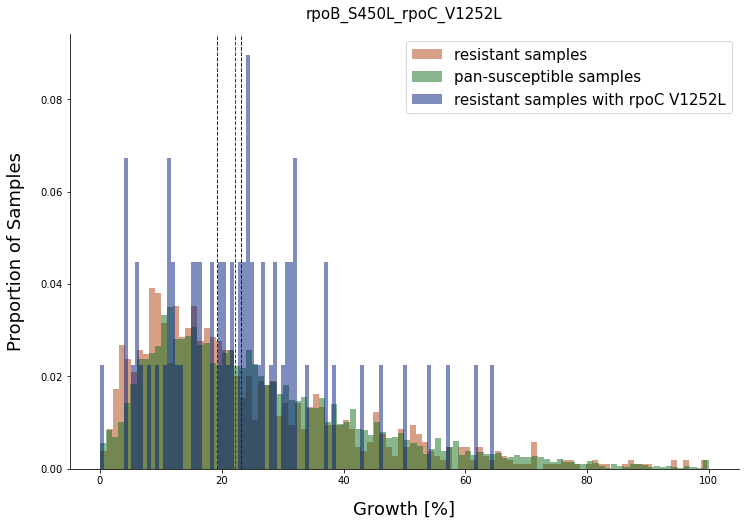

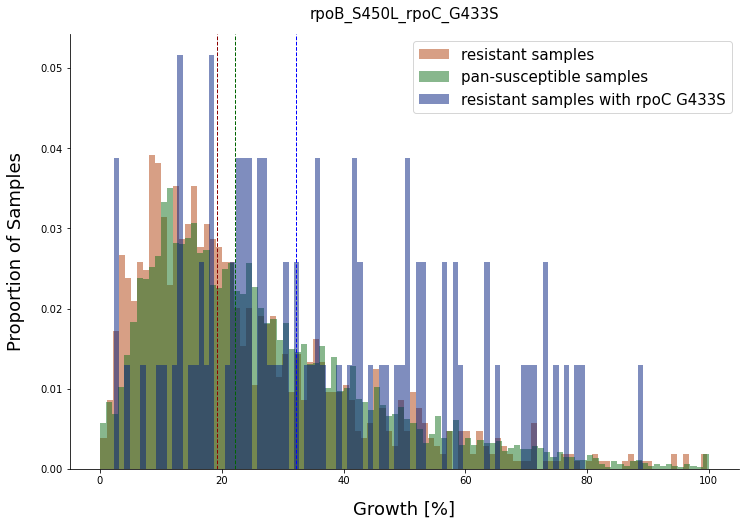

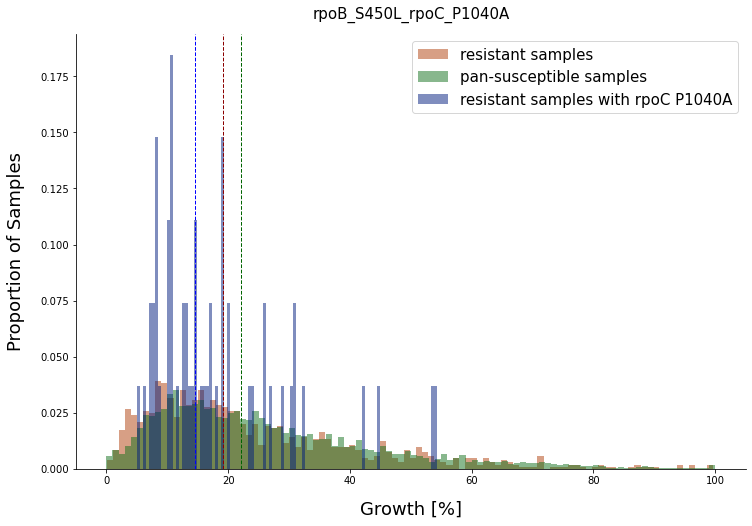

In [17]:
colors = sns.color_palette("dark")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

concat_samples = []

for i,name in enumerate(hits.resistant_mutation.unique()):
    resistance = MUTATIONS[(MUTATIONS.GENE_MUTATION==hits.resistant_mutation.unique()[i])].UNIQUEID
    hit_samples_local=MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(hits.other_mutation.values.tolist()))&(MUTATIONS.UNIQUEID.isin(resistance.tolist()))].UNIQUEID.unique()
    
    concat_samples.append(hit_samples_local)


concat_samples = numpy.concatenate(concat_samples)
concat_samples=pandas.DataFrame(concat_samples,columns=['UNIQUEID'])

hit_samples = []
name=[]

for i, mut in enumerate(hits.resistant_mutation.unique()):
    
    resistance = MUTATIONS[(MUTATIONS.GENE_MUTATION==hits.resistant_mutation.unique()[i])].UNIQUEID
    hit_samples_local= MUTATIONS[(MUTATIONS.GENE_MUTATION.isin(hits.other_mutation.values.tolist())) & (MUTATIONS.UNIQUEID.isin(resistance.tolist()))]
    #construct name to be used as index for plotting (resistant_mutation+other_mutation)
    name_local = mut + '_' + hit_samples_local.GENE_MUTATION
    
    name.append(name_local)
    hit_samples.append(hit_samples_local.UNIQUEID)

hit_samples = numpy.concatenate(hit_samples)
name = numpy.concatenate(name)
hit_samples = pandas.DataFrame(hit_samples,name,columns=['UNIQUEID'])

#filter out all combinations with prevalence of <100
hit_samples = hit_samples.reset_index()
hit_samples.rename(columns = {'index':'mutations'}, inplace=True) 

prevalence=hit_samples.mutations.value_counts()>100
combinations = prevalence[prevalence].index.tolist()

hit_samples = hit_samples.set_index('mutations')

data1 = PLATES[(PLATES.UNIQUEID.isin(pan_sus_samples.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)


for i, combination in enumerate(combinations):
    
    res_CM_samples = hit_samples.loc[combination]
    
    #only include resistant samples with specific resistance mutation in combination
    data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS[EFFECTS.MUTATION==combination[5:10]].UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
    data2.dropna(inplace=True)
    
    data3 = PLATES[(PLATES.UNIQUEID.isin(res_CM_samples.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
    data3.dropna(inplace=True)
    
    if len(data3) < 50:
        continue
    
    stat, p1 = mannwhitneyu(data2, data1)
    stat, p2 = mannwhitneyu(data2, data3)
    stat, p3 = mannwhitneyu(data3, data1)
    
    print(combination, 'resistant to susceptible:',p1, 'resistant to resistant + CMs', p2, 'susceptible to resistant + CMs', p3)
    
    if p1<(0.01/len(combinations)):
        
        fig, ax = plt.subplots()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        fig.set_size_inches(12, 8)

        plt.hist(data2, bins=100, alpha=0.5, label="resistant samples", density=True, color = colors[1])
        plt.axvline(data2.median(), color='darkred', linestyle='dashed', linewidth=1)
        plt.hist(data1, bins=100, alpha=0.5, label="pan-susceptible samples", density=True, color = colors[2])
        plt.axvline(data1.median(), color='darkgreen', linestyle='dashed', linewidth=1)
        plt.hist(data3, bins=100, alpha=0.5, label="resistant samples with " + combination[11:15] + ' ' + combination[16:], density=True, color = colors[0])
        plt.axvline(data3.median(), color='b', linestyle='dashed', linewidth=1)

        plt.xlabel("Growth [%]", size=18, labelpad = 15)
        plt.ylabel("Proportion of Samples", size=18, labelpad = 15)

        plt.legend(loc='upper right', fontsize = 15)
        plt.title(combination, fontsize = 15, pad = 15)
        
        #plt.savefig('/Users/viktoriabrunner/Documents/Studium/PhD/Project1_rev/repository/tb-rnap-compensation/figures/growth_bar_charts/CMs/CM_'+combination)
        

**Figure 3 inlays: Distribution of TB lineages within plotted samples with CMs**

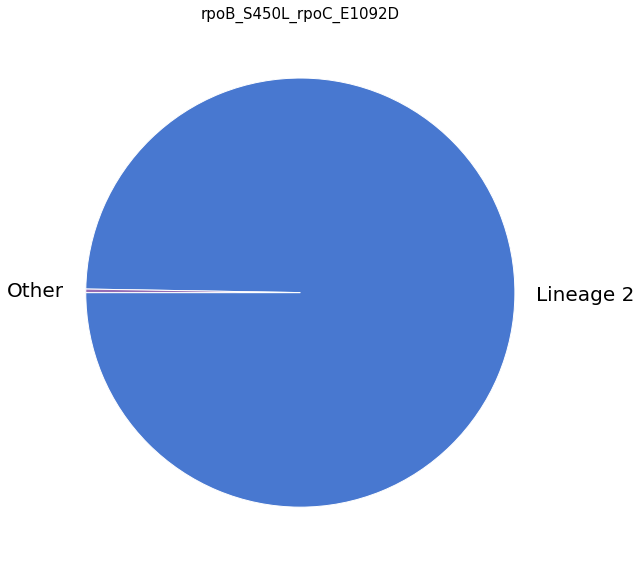

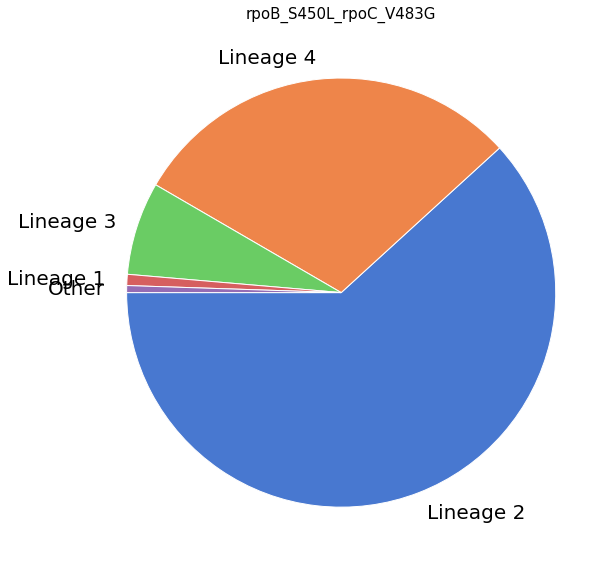

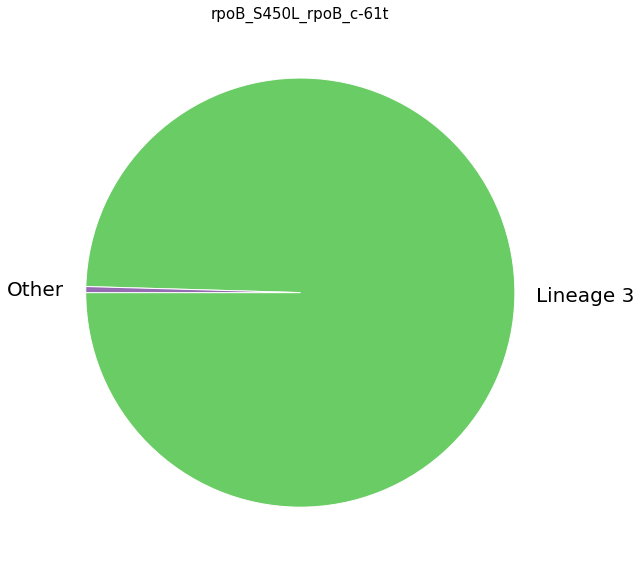

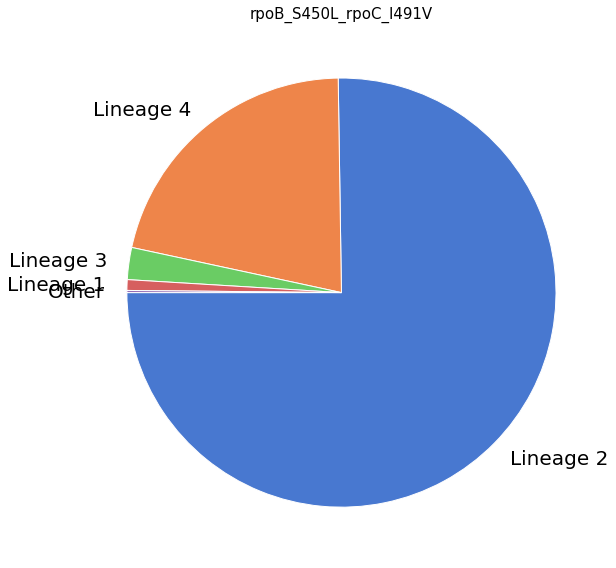

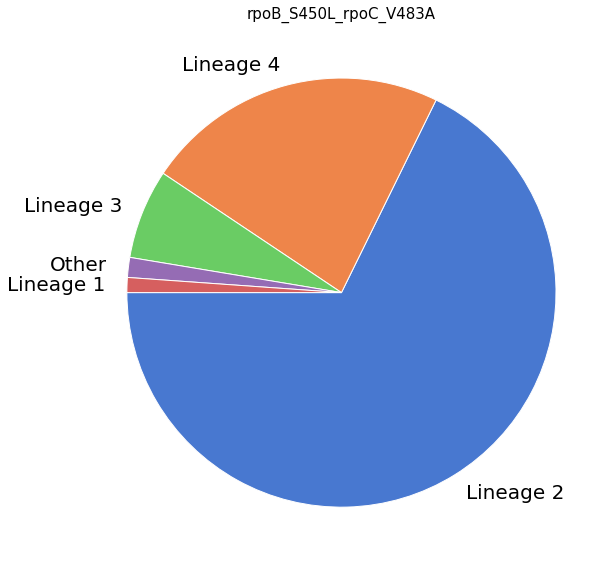

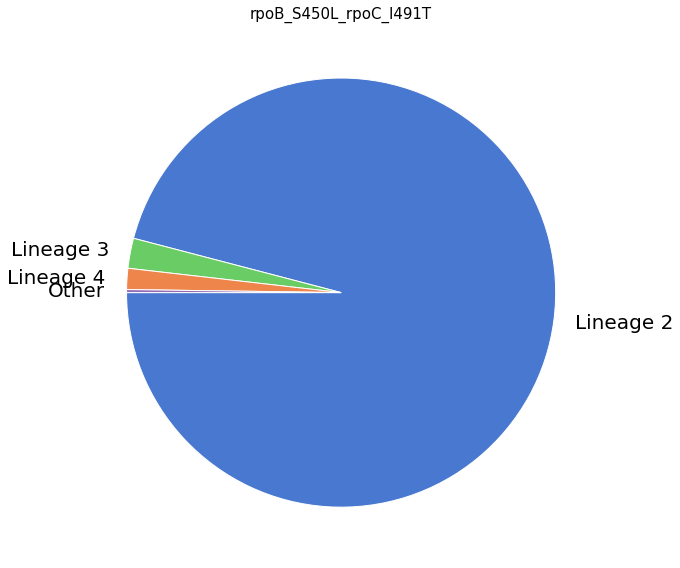

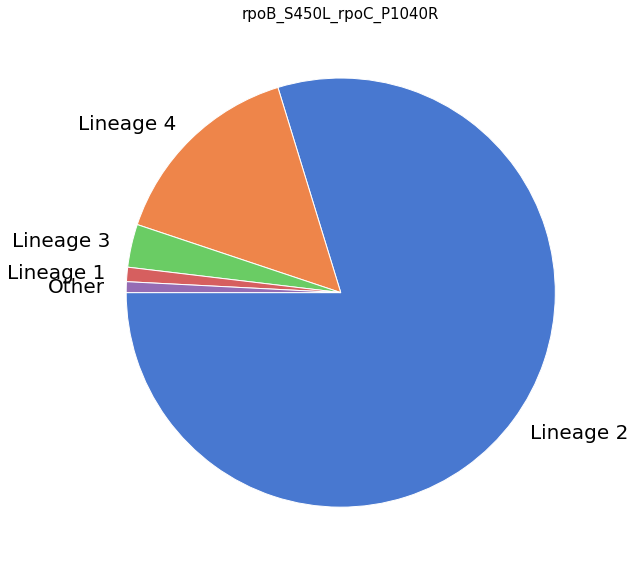

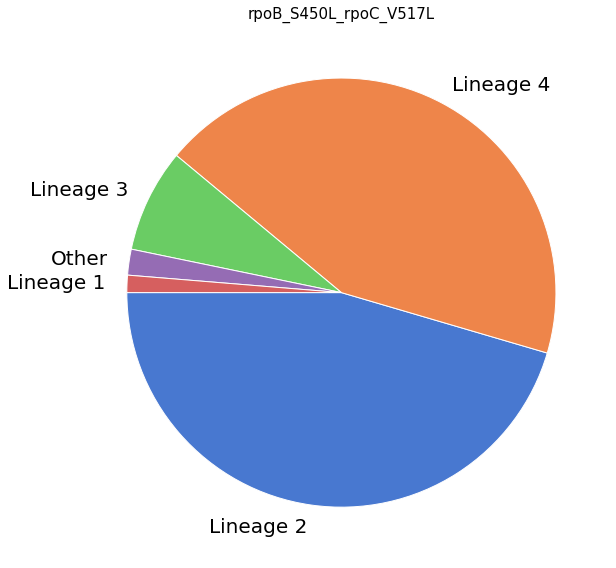

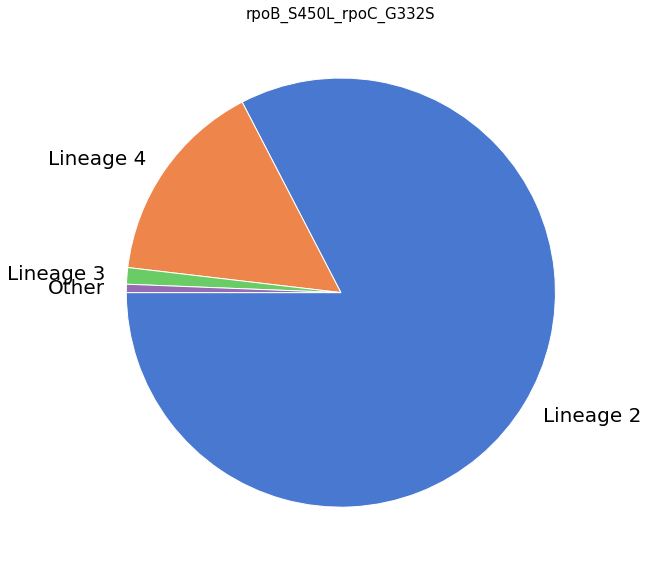

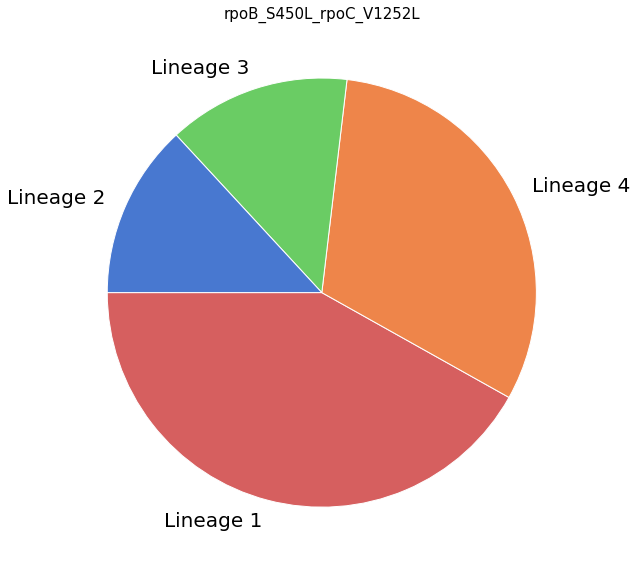

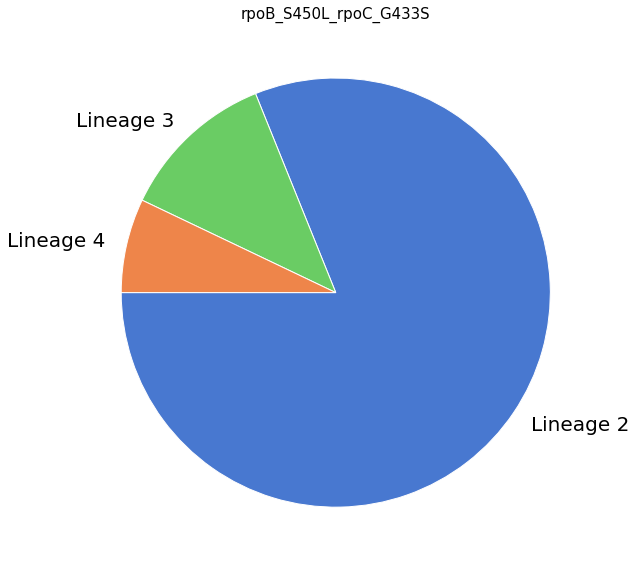

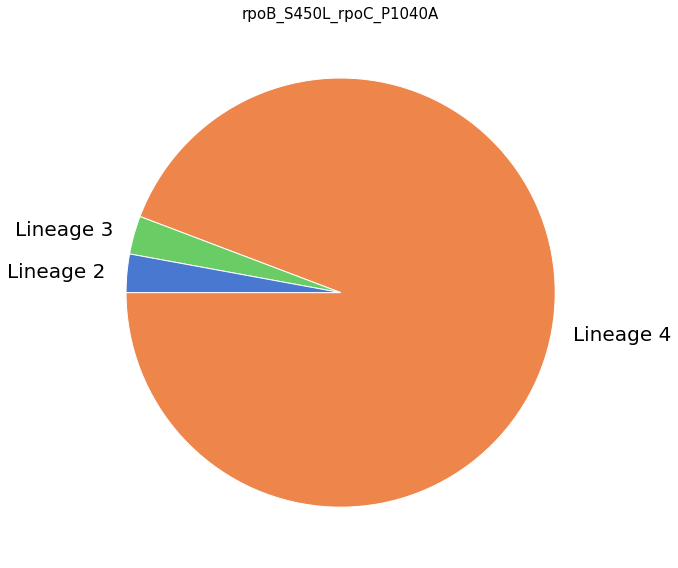

In [19]:
colors = sns.color_palette("muted")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

for i, combination in enumerate(combinations):
    
    res_CM_samples = hit_samples.loc[combination]
    lineages = GENOMES[(GENOMES.index.isin(res_CM_samples.UNIQUEID))].cut_lineages.value_counts()
    
    data2 = PLATES[(PLATES.UNIQUEID.isin(EFFECTS[EFFECTS.MUTATION==combination[5:10]].UNIQUEID.values.tolist()))&(~(PLATES.UNIQUEID.isin(concat_samples.UNIQUEID.values.tolist())))].IM_POS_AVERAGE
    data2.dropna(inplace=True)
    
    data3 = PLATES[(PLATES.UNIQUEID.isin(res_CM_samples.UNIQUEID.values.tolist()))].IM_POS_AVERAGE
    data3.dropna(inplace=True)
    
    if len(data3) < 50:
        continue
        
    stat, p1 = mannwhitneyu(data2, data1)
    
    if p1<(0.01/len(combinations)):
    
        fig, axes = plt.subplots()
        fig.set_size_inches(12, 8)

        patches, texts = plt.pie(lineages, startangle=180, labels = lineages.index,
                                       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, 
                                       textprops={"fontsize":20})

        for j, patch in enumerate(patches):
            if texts[j].get_text() == 'Lineage 2':
                patch.set_facecolor(colors[0])
            if texts[j].get_text() == 'Lineage 4':
                patch.set_facecolor(colors[1])
            if texts[j].get_text() == 'Lineage 3':
                patch.set_facecolor(colors[2])
            if texts[j].get_text() == 'Lineage 1':
                patch.set_facecolor(colors[3])
            if texts[j].get_text() == 'Other':
                patch.set_facecolor(colors[4])

            plt.title(combination, fontsize = 15)
            plt.tight_layout()
            
            #plt.savefig('/Users/viktoriabrunner/Documents/Studium/PhD/Project1_rev/repository/tb-rnap-compensation/figures/lineage_pi_charts/other_threshold/pie_'+combination)


In [45]:
hits_filter = pandas.read_excel('hits_filtered_lineages.xlsx')
hits_filter = hits_filter[hits_filter.directly_resistance_associated==True]
hits_final = hits_filtered[hits.other_mutation.isin(hits_filter.other_mutation)]
print(hits_final.to_latex(index=False))

\begin{tabular}{llr}
\toprule
resistant\_mutation & other\_mutation &  prevalence \\
\midrule
        rpoB\_S450L &     rpoC\_D485Y &         194 \\
        rpoB\_S450L &     rpoB\_I480V &          78 \\
        rpoB\_S450L &     rpoC\_H525Q &          46 \\
        rpoB\_S450L &     rpoA\_V183G &          77 \\
        rpoB\_S450L &    rpoC\_E1092D &        1989 \\
        rpoB\_S450L &     rpoB\_A286V &          56 \\
        rpoB\_S450L &     rpoB\_V496A &          60 \\
        rpoB\_S450L &     rpoC\_T812I &          51 \\
        rpoB\_S450L &     rpoC\_G519D &          51 \\
        rpoB\_S450L &     rpoB\_c-61t &         737 \\
        rpoB\_S450L &     rpoC\_W484G &          80 \\
        rpoB\_S450L &    rpoC\_P1040S &         118 \\
        rpoB\_S450L &     rpoB\_A405P &          48 \\
        rpoB\_S450L &     rpoB\_L731P &         226 \\
        rpoB\_S450L &     rpoC\_L449V &          50 \\
        rpoB\_S450L &     sigA\_D146E &          50 \\
        rpoB\_S450L &     

/var/folders/qq/hh4z_qvd2l183wg_57cf1pyc0000gn/T/ipykernel_70254/1678236840.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hits_final = hits_filtered[hits.other_mutation.isin(hits_filter.other_mutation)]


**Figure 4A: Analysis of Lineage 2 and 4 growth distributions**

7.988375177065574e-33


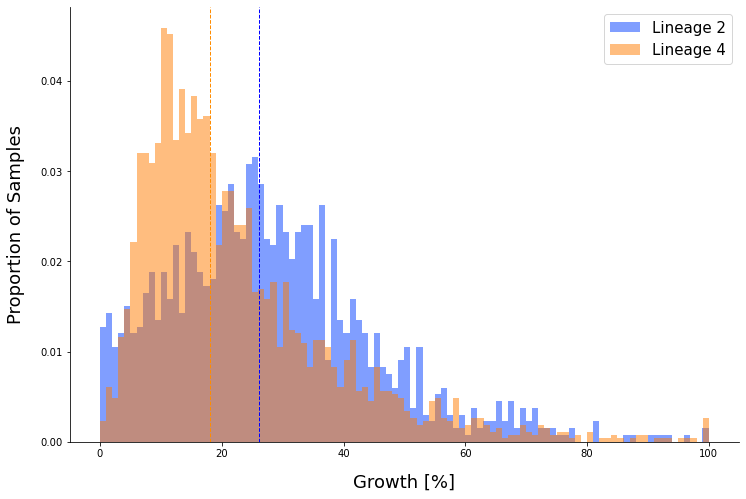

In [21]:
colors = sns.color_palette("bright")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

condition = GENOMES.WGS_PREDICTION_STRING.str[0:4].isin(['SSSS'])

lineage1 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 1')].index.to_series()
data1 = PLATES[(PLATES.UNIQUEID.isin(lineage1.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)

lineage2 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 2')].index.to_series()
data2 = PLATES[(PLATES.UNIQUEID.isin(lineage2.values.tolist()))].IM_POS_AVERAGE
data2.dropna(inplace=True)

lineage3 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 3')].index.to_series()
data3 = PLATES[(PLATES.UNIQUEID.isin(lineage3.values.tolist()))].IM_POS_AVERAGE
data3.dropna(inplace=True)

lineage4 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 4')].index.to_series()
data4 = PLATES[(PLATES.UNIQUEID.isin(lineage4.values.tolist()))].IM_POS_AVERAGE
data4.dropna(inplace=True)

stat5, p5 = mannwhitneyu(data2, data4)

print(p5)

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)

plt.hist(data2, bins=100, alpha=0.5, label="Lineage 2", density=True, color = colors[0])
plt.axvline(data2.median(), color='b', linestyle='dashed', linewidth=1)
plt.hist(data4, bins=100, alpha=0.5, label="Lineage 4", density=True, color = colors[1])
plt.axvline(data4.median(), color='darkorange', linestyle='dashed', linewidth=1)

plt.xlabel("Growth [%]", size=18, labelpad = 15)
plt.ylabel("Proportion of Samples", size=18, labelpad = 15)

plt.legend(loc='upper right', fontsize = 15)

**Figure 4B: Analysis of all Lineage growth distributions**

0.07173783246510695 8.681782045749693e-14 1.2195220570564877e-05 8.364334313772049e-16 3.312777531300847e-64


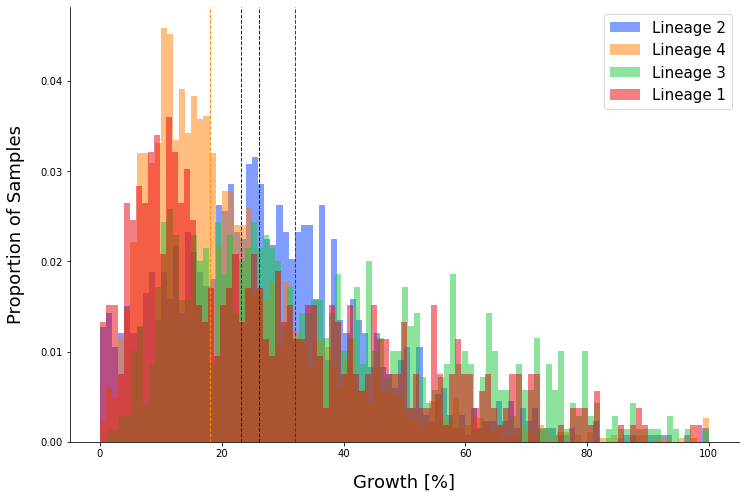

In [23]:
colors = sns.color_palette("bright")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

lineage1 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 1')].index.to_series()
data1 = PLATES[(PLATES.UNIQUEID.isin(lineage1.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)

lineage3 = GENOMES[(condition) & (GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 3')].index.to_series()
data3 = PLATES[(PLATES.UNIQUEID.isin(lineage3.values.tolist()))].IM_POS_AVERAGE
data3.dropna(inplace=True)

stat1, p1 = mannwhitneyu(data1, data2)
stat2, p2 = mannwhitneyu(data1, data3)
stat3, p3 = mannwhitneyu(data1, data4)
stat4, p4 = mannwhitneyu(data2, data3)
stat6, p6 = mannwhitneyu(data3, data4)

print(p1, p2, p3, p4, p6)

fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.set_size_inches(12, 8)


plt.hist(data2, bins=100, alpha=0.5, label="Lineage 2", density=True, color = colors[0])
plt.axvline(data2.median(), color='b', linestyle='dashed', linewidth=1)
plt.hist(data4, bins=100, alpha=0.5, label="Lineage 4", density=True, color = colors[1])
plt.axvline(data4.median(), color='darkorange', linestyle='dashed', linewidth=1)
plt.hist(data3, bins=100, alpha=0.5, label="Lineage 3", density=True, color = colors[2])
plt.axvline(data3.median(), color='darkgreen', linestyle='dashed', linewidth=1)
plt.hist(data1, bins=100, alpha=0.5, label="Lineage 1", density=True, color = colors[3])
plt.axvline(data1.median(), color='darkred', linestyle='dashed', linewidth=1)

plt.xlabel("Growth [%]", size=18, labelpad = 15)
plt.ylabel("Proportion of Samples", size=18, labelpad = 15)

plt.legend(loc='upper right', fontsize = 15)

**Figure 4C,D,E,F/ S3: Plot only susceptibles in lineage 2 against resistance + CM in lineage 2 for all remaining CMs to find out if better growth than wt is only due to lineage 2 prevalence in resistant samples**

rpoB_S450L_rpoC_E1092D 0.00015215905899713654
rpoB_S450L_rpoC_V483G 0.9684906145565637
rpoB_S450L_rpoC_I491V 5.247700198695069e-28
rpoB_S450L_rpoC_V483A 1.3204686201359469e-09
rpoB_S450L_rpoC_I491T 1.4401800101294675e-09
rpoB_S450L_rpoC_P1040R 0.4200117133015656
rpoB_S450L_rpoC_G332S 2.0830536712299127e-07
rpoB_S450L_rpoC_G433S 5.3616400299751655e-05


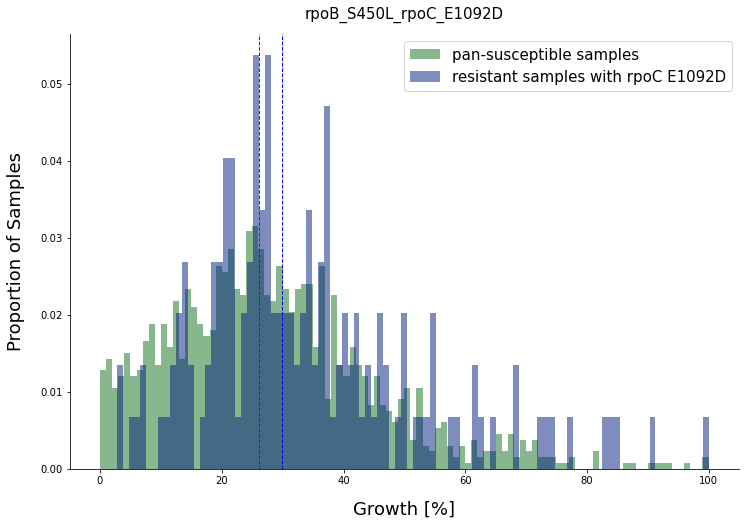

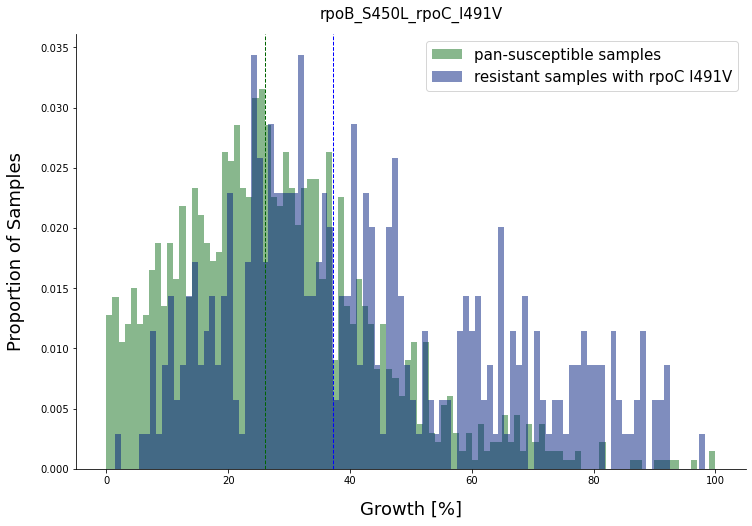

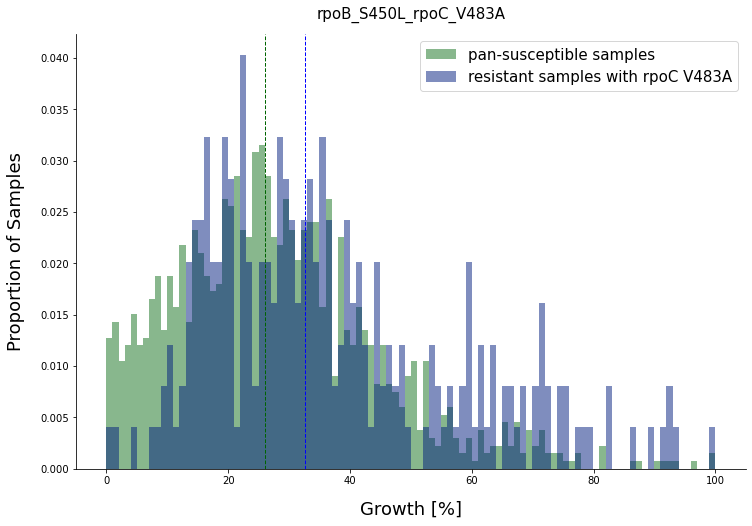

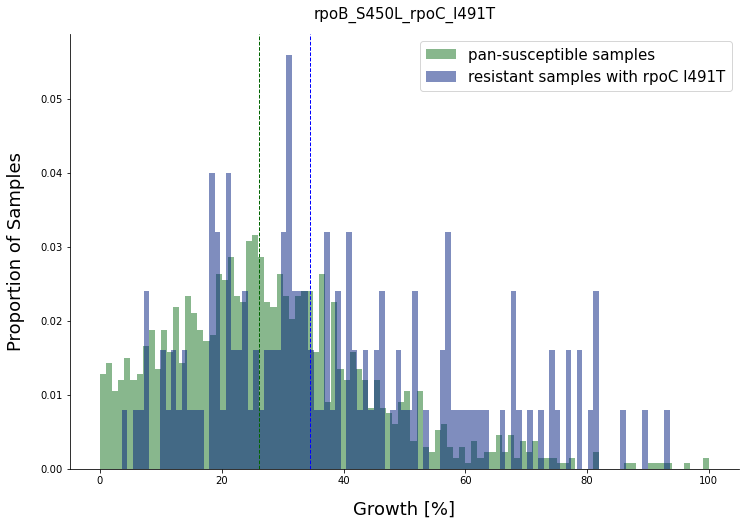

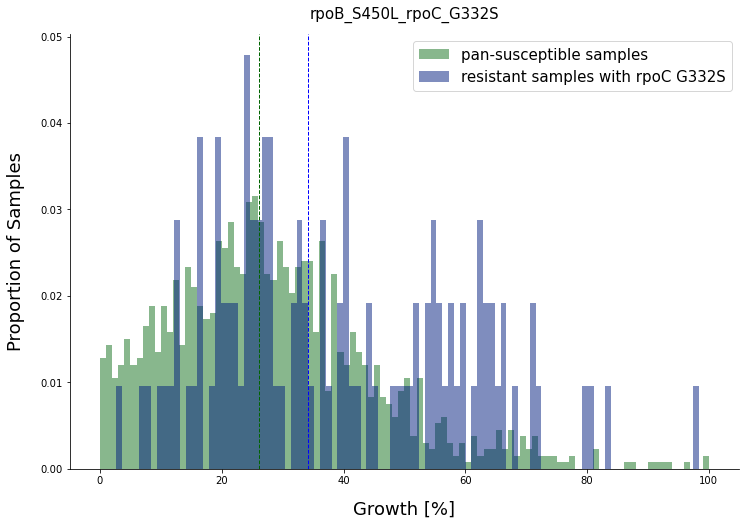

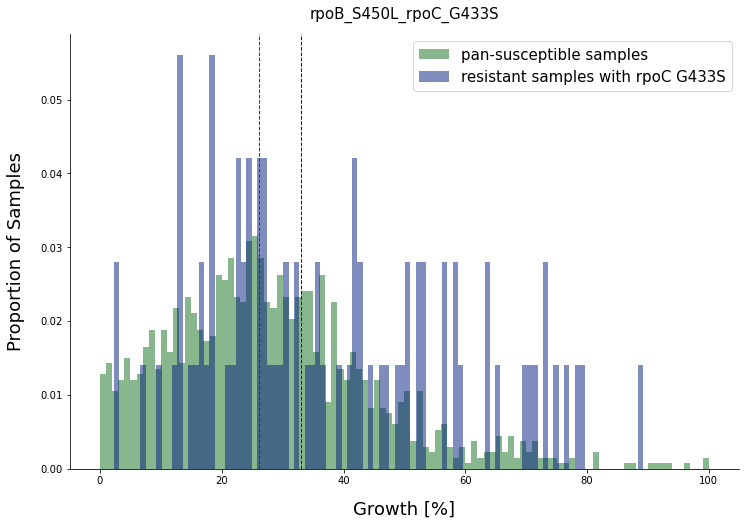

In [25]:
colors = sns.color_palette("dark")
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

condition1 = GENOMES.WGS_PREDICTION_STRING.str[0:4].isin(['SSSS'])
condition2 = GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 2'

lineage2 = GENOMES[(condition) & (condition2)].index.to_series()
data1 = PLATES[(PLATES.UNIQUEID.isin(lineage2.values.tolist()))].IM_POS_AVERAGE
data1.dropna(inplace=True)

for i, combination in enumerate(combinations):
    res_CM_samples = hit_samples.loc[combination]

    data3 = PLATES[(PLATES.UNIQUEID.isin(res_CM_samples.UNIQUEID.values.tolist())) & (PLATES.UNIQUEID.isin(GENOMES[GENOMES.MYKROBE_LINEAGE_NAME_1 == 'Lineage 2'].index.to_series()))].IM_POS_AVERAGE
    data3.dropna(inplace=True)
    
    if len(data3) < 50:
        continue
    
    stat, p1 = mannwhitneyu(data3, data1)
    
    print(combination, p1)
    
    if p1<(0.01/len(combinations)):
        
        fig, ax = plt.subplots()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        fig.set_size_inches(12, 8)

        plt.hist(data1, bins=100, alpha=0.5, label="pan-susceptible samples", density=True, color = colors[2])
        plt.axvline(data1.median(), color='darkgreen', linestyle='dashed', linewidth=1)
        plt.hist(data3, bins=100, alpha=0.5, label="resistant samples with " + combination[11:15] + ' ' + combination[16:], density=True, color = colors[0])
        plt.axvline(data3.median(), color='b', linestyle='dashed', linewidth=1)

        plt.xlabel("Growth [%]", size=18, labelpad = 15)
        plt.ylabel("Proportion of Samples", size=18, labelpad = 15)

        plt.legend(loc='upper right', fontsize = 15)
        plt.title(combination, fontsize = 15, pad = 15)

**Table 1: Final list with all significantly resistance-associated other mutations without the presumed lineage associated ones**

Excluded all mutations with over 95% of samples originating from one lineage only from downstream analysis, since they are most likely not directly resistance associated except for if they came up as enhancing growth within lineage 2:
- final hit list is saved as 'hits_filtered_lineages.xlsx' and has additional columns for likely resistance association and most common lineage for samples with this mutation

In [26]:
hits_filter = pandas.read_excel('hits_filtered_lineages.xlsx')
hits_filter = hits_filter[hits_filter.directly_resistance_associated==True]
hits_final = hits[hits.other_mutation.isin(hits_filter.other_mutation)]
print(hits_final.to_latex(index=False))

\begin{tabular}{ll}
\toprule
resistant\_mutation & other\_mutation \\
\midrule
        rpoB\_S450L &     rpoC\_D485Y \\
        rpoB\_S450L &     rpoB\_I480V \\
        rpoB\_S450L &     rpoC\_H525Q \\
        rpoB\_S450L &     rpoA\_V183G \\
        rpoB\_S450L &    rpoC\_E1092D \\
        rpoB\_L430P &    rpoC\_E1092D \\
        rpoB\_V170F &    rpoC\_E1092D \\
        rpoB\_S450L &     rpoB\_A286V \\
        rpoB\_S450L &     rpoB\_V496A \\
        rpoB\_S450L &     rpoC\_T812I \\
        rpoB\_S450L &     rpoC\_G519D \\
        rpoB\_S450W &     rpoC\_G519D \\
        rpoB\_S450L &     rpoC\_W484G \\
        rpoB\_V170F &     rpoC\_W484G \\
        rpoB\_S450L &    rpoC\_P1040S \\
        rpoB\_S450L &     rpoB\_L731P \\
        rpoB\_S450L &     rpoC\_L449V \\
        rpoB\_S450L &    rpoC\_V1039A \\
        rpoB\_S450L &     rpoB\_I488V \\
        rpoB\_S450L &    rpoC\_P1040R \\
        rpoB\_S450L &     rpoC\_V431M \\
        rpoB\_S450L &     rpoC\_A521D \\
        rpoB\_S450L

**Figure 5: PyMOL views of found hits**

Done outside of this notebook, simply took the list of prevalence-filtered, directly resistance-associated hits and mapped them onto a PyMOL structure of the TB RNA polymerase with found Rifampicin